# Restaurant Food Cost Dataset

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [424]:
train=pd.read_excel('food_train.xlsx')

In [425]:
test=pd.read_excel('food_test.xlsx')

In [426]:
df_train=pd.DataFrame(train)

In [427]:
df_test=pd.DataFrame(test)

In [428]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [429]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [430]:
df_train.shape,df_test.shape

((12690, 9), (4231, 8))

In [431]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [432]:
df_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

# checking null values

In [433]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [434]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [435]:
df_train.CITY=df_train.CITY.fillna(df_train.CITY.mode()[0])
df_test.CITY=df_test.CITY.fillna(df_test.CITY.mode()[0])

In [436]:
df_train.LOCALITY=df_train.LOCALITY.fillna(df_train.LOCALITY.mode()[0])
df_test.LOCALITY=df_test.LOCALITY.fillna(df_test.LOCALITY.mode()[0])

In [437]:
df_train.RATING=df_train.RATING.fillna(df_train.RATING.mode()[0])
df_test.RATING=df_test.RATING.fillna(df_test.RATING.mode()[0])

In [438]:
df_train.VOTES=df_train.VOTES.fillna(df_train.VOTES.mode()[0])
df_test.VOTES=df_test.VOTES.fillna(df_test.VOTES.mode()[0])

In [439]:
df_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [440]:
df_test.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

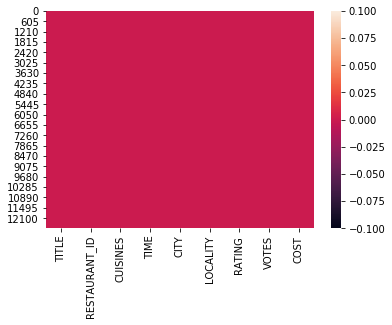

In [441]:
sns.heatmap(df_train.isnull())

now there is no null values in this dataset

In [442]:
df_train.TITLE.unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [443]:
df_train.CUISINES.value_counts()

South Indian                                    532
North Indian                                    526
North Indian, Chinese                           501
Fast Food                                       286
Chinese                                         167
                                               ... 
Tex-Mex, Italian, Coffee                          1
North Indian, Mughlai, Biryani, BBQ, Chinese      1
North Indian, Chinese, Rajasthani                 1
Chinese, Italian, European                        1
North Indian, Biryani, Rolls                      1
Name: CUISINES, Length: 4155, dtype: int64

In [444]:
df_train.CITY.unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powa

In [445]:
df_train.LOCALITY.unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ..., 'Market Road',
       'Near Perambur', 'Near Malviya Nagar'], dtype=object)

# Data Cleaning

In [446]:
df_train.TITLE=df_train.TITLE.str.upper()
df_test.TITLE=df_test.TITLE.str.upper()

In [447]:
df_train.TITLE=df_train.TITLE.str.replace(',','')
df_test.TITLE=df_test.TITLE.str.replace(',','')

In [448]:
df_train.TITLE

0           CASUAL DINING
1        CASUAL DININGBAR
2           CASUAL DINING
3             QUICK BITES
4          DESSERT PARLOR
               ...       
12685         QUICK BITES
12686    CASUAL DININGBAR
12687              LOUNGE
12688       CASUAL DINING
12689       CASUAL DINING
Name: TITLE, Length: 12690, dtype: object

In [449]:
len(df_train.TITLE)

12690

In [450]:
df_train.TITLE=df_train.TITLE.str.split(' ')
df_test.TITLE=df_test.TITLE.str.split(' ')

In [451]:
df_train['TITLE1']=df_train.TITLE.str[-1]
df_test['TITLE1']=df_test.TITLE.str[-1]

In [452]:
df_train['TITLE2']=df_train.TITLE.str[0]
df_test['TITLE2']=df_test.TITLE.str[0]

In [453]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2
0,"[CASUAL, DINING]",9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,DINING,CASUAL
1,"[CASUAL, DININGBAR]",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,DININGBAR,CASUAL
2,"[CASUAL, DINING]",10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,DINING,CASUAL
3,"[QUICK, BITES]",6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,BITES,QUICK
4,"[DESSERT, PARLOR]",15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,PARLOR,DESSERT


In [454]:
df_train['TITLE1'].value_counts()

BITES                  4479
DINING                 4225
NONE                   1003
CAFÉ                    607
PARLOR                  520
DININGBAR               381
BAKERY                  302
SHOP                    293
LOUNGE                   98
BAR                      94
COURT                    93
DININGCAFÉ               58
MESS                     53
KIOSK                    53
PUB                      50
DHABA                    45
TRUCK                    31
CAFÉBAKERY               29
DININGLOUNGE             25
DININGPUB                21
CLUB                     20
BITESBAKERY              20
LOUNGEBAR                19
CAFÉBAR                  17
BARLOUNGE                16
PUBMICROBREWERY          14
BAKERYCAFÉ               13
PARLORBAKERY             12
DININGMICROBREWERY        9
MICROBREWERY              8
PARLORCAFÉ                8
BARPUB                    7
DININGBAKERY              6
BITESCAFÉ                 5
PUBBAR                    4
PUBLOUNGE           

In [455]:
df_train.drop('TITLE',axis=1,inplace=True)
df_test.drop('TITLE',axis=1,inplace=True)

In [456]:
#RestaurantID
df_train.drop('RESTAURANT_ID',axis=1,inplace=True)
df_test.drop('RESTAURANT_ID',axis=1,inplace=True)

In [457]:
df_train.head()

,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2
0,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,DINING,CASUAL
1,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,DININGBAR,CASUAL
2,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,DINING,CASUAL
3,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,BITES,QUICK
4,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,PARLOR,DESSERT


In [458]:
#CUISINES
df_train.CUISINES=df_train.CUISINES.str.lower()
df_test.CUISINES=df_test.CUISINES.str.lower()

In [459]:
df_train.CUISINES=df_train.CUISINES.str.split(',')
df_test.CUISINES=df_test.CUISINES.str.split(',')

In [460]:
df_train.CUISINES

0                          [malwani,  goan,  north indian]
1                       [asian,  modern indian,  japanese]
2          [north indian,  chinese,  biryani,  hyderabadi]
3                                      [tibetan,  chinese]
4                                               [desserts]
                               ...                        
12685                      [north indian,  burger,  kebab]
12686                                 [goan,  continental]
12687        [finger food,  continental,  asian,  chinese]
12688    [north indian,  south indian,  chinese,  stree...
12689                             [north indian,  chinese]
Name: CUISINES, Length: 12690, dtype: object

In [461]:
df_train['CUISINES1']=df_train.CUISINES.str[0]
df_test['CUISINES1']=df_test.CUISINES.str[0]

In [462]:
df_train['CUISINES2']=df_train.CUISINES.str[1]
df_test['CUISINES2']=df_test.CUISINES.str[1]

In [463]:
df_train['CUISINES3']=df_train.CUISINES.str[2]
df_test['CUISINES3']=df_test.CUISINES.str[2]

In [464]:
df_train['CUISINES4']=df_train.CUISINES.str[3]
df_test['CUISINES4']=df_test.CUISINES.str[3]

In [465]:
df_train['CUISINES5']=df_train.CUISINES.str[4]
df_test['CUISINES5']=df_test.CUISINES.str[4]

In [466]:
df_train['CUISINES6']=df_train.CUISINES.str[5]
df_test['CUISINES6']=df_test.CUISINES.str[5]

In [467]:
df_train['CUISINES7']=df_train.CUISINES.str[6]
df_test['CUISINES7']=df_test.CUISINES.str[6]

In [468]:
df_train['CUISINES8']=df_train.CUISINES.str[6]
df_test['CUISINES8']=df_test.CUISINES.str[6]

In [469]:
df_train['CUISINES9']=df_train.CUISINES.str[7]
df_test['CUISINES9']=df_test.CUISINES.str[7]

In [470]:
df_train.CUISINES9.unique()

array([nan, '', ' healthy food', ' pizza', ' ice cream', ' lebanese',
       ' desserts', ' asian', ' mexican', ' fast food', ' rolls',
       ' beverages', ' chinese', ' momos', ' north indian', ' burger',
       ' coffee and tea', ' cafe food', ' salad', ' european'],
      dtype=object)

In [471]:
df_train.head()

,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,CUISINES9
0,"[malwani, goan, north indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,DINING,CASUAL,malwani,goan,north indian,NaN,NaN,NaN,NaN,NaN,NaN
1,"[asian, modern indian, japanese]",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,DININGBAR,CASUAL,asian,modern indian,japanese,NaN,NaN,NaN,NaN,NaN,NaN
2,"[north indian, chinese, biryani, hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,DINING,CASUAL,north indian,chinese,biryani,hyderabadi,NaN,NaN,NaN,NaN,NaN
3,"[tibetan, chinese]",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,BITES,QUICK,tibetan,chinese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[desserts],11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,PARLOR,DESSERT,desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [472]:

df_train.drop('CUISINES',axis=1,inplace=True)
df_test.drop('CUISINES',axis=1,inplace=True)

In [473]:
df_test.head()

,TIME,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,CUISINES9
0,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,DINING,CASUAL,north indian,chinese,mughlai,kebab,NaN,NaN,NaN,NaN,NaN
1,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,BITES,QUICK,south indian,fast food,pizza,north indian,NaN,NaN,NaN,NaN,NaN
2,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,DINING,CASUAL,north indian,seafood,biryani,chinese,NaN,NaN,NaN,NaN,NaN
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,NONE,NONE,biryani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,BITES,QUICK,south indian,kerala,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [474]:
#CITY
df_train.CITY=df_train.CITY.str.upper()
df_test.CITY=df_test.CITY.str.upper()

In [475]:
#LOCALITY
df_train.LOCALITY=df_train.LOCALITY.str.lower()
df_test.LOCALITY=df_test.LOCALITY.str.lower()

In [476]:
#RATING
df_train.RATING=df_train.RATING.str.replace('NEW','0')
df_test.RATING=df_test.RATING.str.replace('NEW','0')

In [477]:
#RATING
df_train.RATING=df_train.RATING.str.replace('-','0')
df_test.RATING=df_test.RATING.str.replace('-','0')

In [478]:
df_train.RATING.unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '0',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [479]:

df_train.RATING=df_train.RATING.astype('float64')
df_test.RATING=df_test.RATING.astype('float64')

In [480]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIME       12690 non-null  object 
 1   CITY       12690 non-null  object 
 2   LOCALITY   12690 non-null  object 
 3   RATING     12690 non-null  float64
 4   VOTES      12690 non-null  object 
 5   COST       12690 non-null  int64  
 6   TITLE1     12690 non-null  object 
 7   TITLE2     12690 non-null  object 
 8   CUISINES1  12690 non-null  object 
 9   CUISINES2  9628 non-null   object 
 10  CUISINES3  5691 non-null   object 
 11  CUISINES4  2695 non-null   object 
 12  CUISINES5  1015 non-null   object 
 13  CUISINES6  414 non-null    object 
 14  CUISINES7  176 non-null    object 
 15  CUISINES8  176 non-null    object 
 16  CUISINES9  77 non-null     object 
dtypes: float64(1), int64(1), object(15)
memory usage: 1.6+ MB


In [481]:
#votes
df_train.VOTES=df_train.VOTES.str.replace('votes','').astype(int)

In [482]:
df_test.VOTES=df_test.VOTES.str.replace('votes','').astype(int)

In [483]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIME       4231 non-null   object 
 1   CITY       4231 non-null   object 
 2   LOCALITY   4231 non-null   object 
 3   RATING     4231 non-null   float64
 4   VOTES      4231 non-null   int32  
 5   TITLE1     4231 non-null   object 
 6   TITLE2     4231 non-null   object 
 7   CUISINES1  4231 non-null   object 
 8   CUISINES2  3246 non-null   object 
 9   CUISINES3  1900 non-null   object 
 10  CUISINES4  917 non-null    object 
 11  CUISINES5  356 non-null    object 
 12  CUISINES6  137 non-null    object 
 13  CUISINES7  74 non-null     object 
 14  CUISINES8  74 non-null     object 
 15  CUISINES9  31 non-null     object 
dtypes: float64(1), int32(1), object(14)
memory usage: 512.5+ KB


In [484]:
#TIME

df_train.drop('TIME',axis=1,inplace=True)
df_test.drop('TIME',axis=1,inplace=True)

In [485]:
df_train.shape,df_test.shape

((12690, 16), (4231, 15))

In [486]:
df_train.isnull().sum()

CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
TITLE1           0
TITLE2           0
CUISINES1        0
CUISINES2     3062
CUISINES3     6999
CUISINES4     9995
CUISINES5    11675
CUISINES6    12276
CUISINES7    12514
CUISINES8    12514
CUISINES9    12613
dtype: int64

In [487]:
df_train.fillna('none',inplace=True)
df_test.fillna('none',inplace=True)

In [489]:
df_test.isnull().sum()

CITY         0
LOCALITY     0
RATING       0
VOTES        0
TITLE1       0
TITLE2       0
CUISINES1    0
CUISINES2    0
CUISINES3    0
CUISINES4    0
CUISINES5    0
CUISINES6    0
CUISINES7    0
CUISINES8    0
CUISINES9    0
dtype: int64

(array([1.1513e+04, 9.7800e+02, 1.5500e+02, 3.6000e+01, 5.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   20.,  1418.,  2816.,  4214.,  5612.,  7010.,  8408.,  9806.,
        11204., 12602., 14000.]),
 <a list of 10 Patch objects>)

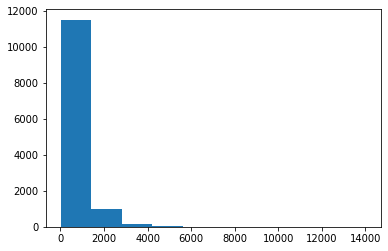

In [490]:
plt.hist(df_train.COST)

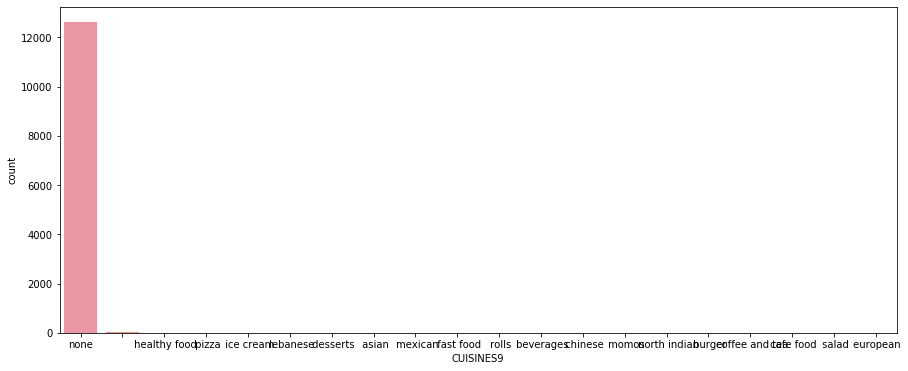

In [492]:
plt.figure(figsize=(15,6))
sns.countplot(df_train.CUISINES9)

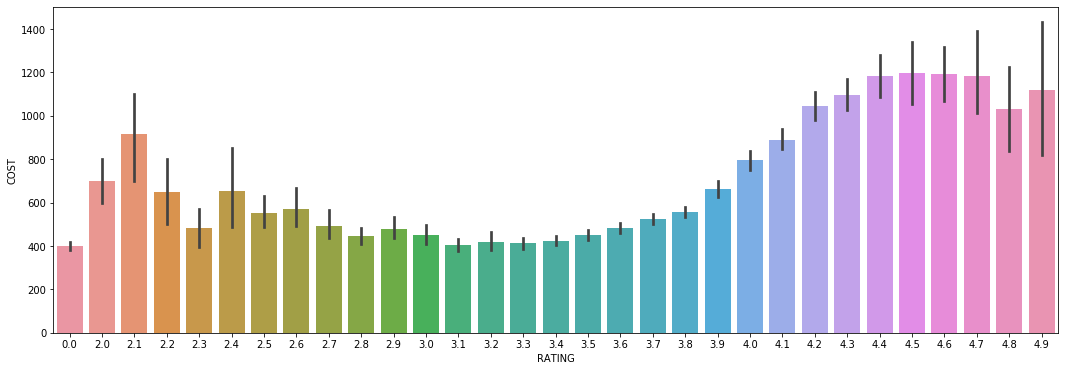

In [493]:
plt.figure(figsize=(18,6))

sns.barplot(df_train.RATING,df_train.COST)

# Labeling

In [495]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [496]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CITY       12690 non-null  object 
 1   LOCALITY   12690 non-null  object 
 2   RATING     12690 non-null  float64
 3   VOTES      12690 non-null  int32  
 4   COST       12690 non-null  int64  
 5   TITLE1     12690 non-null  object 
 6   TITLE2     12690 non-null  object 
 7   CUISINES1  12690 non-null  object 
 8   CUISINES2  12690 non-null  object 
 9   CUISINES3  12690 non-null  object 
 10  CUISINES4  12690 non-null  object 
 11  CUISINES5  12690 non-null  object 
 12  CUISINES6  12690 non-null  object 
 13  CUISINES7  12690 non-null  object 
 14  CUISINES8  12690 non-null  object 
 15  CUISINES9  12690 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(13)
memory usage: 1.5+ MB


In [497]:
df_train.columns

Index(['CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'TITLE1', 'TITLE2',
       'CUISINES1', 'CUISINES2', 'CUISINES3', 'CUISINES4', 'CUISINES5',
       'CUISINES6', 'CUISINES7', 'CUISINES8', 'CUISINES9'],
      dtype='object')

In [498]:
df_train[['CITY','LOCALITY','TITLE1', 'TITLE2','CUISINES1', 'CUISINES2', 'CUISINES3', 'CUISINES4', 'CUISINES5','CUISINES6', 'CUISINES7', 'CUISINES8', 'CUISINES9']]=df_train[['CITY','LOCALITY','TITLE1', 'TITLE2','CUISINES1', 'CUISINES2', 'CUISINES3', 'CUISINES4', 'CUISINES5','CUISINES6', 'CUISINES7', 'CUISINES8', 'CUISINES9']].apply(le.fit_transform)
df_test[['CITY','LOCALITY','TITLE1', 'TITLE2','CUISINES1', 'CUISINES2', 'CUISINES3', 'CUISINES4', 'CUISINES5','CUISINES6', 'CUISINES7', 'CUISINES8', 'CUISINES9']]=df_train[['CITY','LOCALITY','TITLE1', 'TITLE2','CUISINES1', 'CUISINES2', 'CUISINES3', 'CUISINES4', 'CUISINES5','CUISINES6', 'CUISINES7', 'CUISINES8', 'CUISINES9']].apply(le.fit_transform)

In [499]:
df_train.head()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,CUISINES9
0,326,279,3.6,49,1200,25,26,59,32,66,85,78,69,47,47,19
1,67,1037,4.2,30,1500,27,26,6,60,41,85,78,69,47,47,19
2,67,1092,3.8,221,800,25,26,72,23,12,32,78,69,47,47,19
3,225,127,4.1,24,800,9,63,100,23,93,85,78,69,47,47,19
4,225,613,3.8,165,300,46,33,28,98,93,85,78,69,47,47,19


In [500]:
df_test.head()

,CITY,LOCALITY,RATING,VOTES,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,CUISINES9
0,326,279,4.3,564,25,26,59,32,66,85,78,69,47,47,19
1,67,1037,4.2,61,27,26,6,60,41,85,78,69,47,47,19
2,67,1092,3.8,350,25,26,72,23,12,32,78,69,47,47,19
3,225,127,3.8,1445,9,63,100,23,93,85,78,69,47,47,19
4,225,613,3.6,23,46,33,28,98,93,85,78,69,47,47,19


# Correlation

In [501]:
df_train.corr()

,CITY,LOCALITY,RATING,VOTES,COST,TITLE1,TITLE2,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,CUISINES6,CUISINES7,CUISINES8,CUISINES9
CITY,1.000000,0.040375,-0.057013,0.041766,0.043326,0.031019,-0.017951,0.011924,0.009440,0.000641,0.003583,-0.003562,0.000865,-0.004622,-0.004622,-0.000523
LOCALITY,0.040375,1.000000,-0.017828,-0.030093,-0.015541,-0.017416,0.028478,0.019641,0.021574,0.014757,0.017324,0.016364,0.012840,0.020409,0.020409,0.023989
RATING,-0.057013,-0.017828,1.000000,0.243875,0.232194,0.084981,-0.111549,-0.023285,-0.093964,-0.119617,-0.118987,-0.084089,-0.071299,-0.040067,-0.040067,-0.029935
VOTES,0.041766,-0.030093,0.243875,1.000000,0.255723,0.070323,-0.133116,-0.040004,-0.086104,-0.146873,-0.139265,-0.100959,-0.069244,-0.060479,-0.060479,-0.064379
COST,0.043326,-0.015541,0.232194,0.255723,1.000000,0.125410,-0.291586,-0.038191,-0.078027,-0.172210,-0.173326,-0.112673,-0.082179,-0.053524,-0.053524,-0.044307
TITLE1,0.031019,-0.017416,0.084981,0.070323,0.125410,1.000000,-0.225418,-0.031378,-0.062343,-0.037483,-0.045193,-0.053299,-0.037468,-0.022483,-0.022483,-0.015554
TITLE2,-0.017951,0.028478,-0.111549,-0.133116,-0.291586,-0.225418,1.000000,0.256908,0.141587,0.159394,0.136109,0.096516,0.054547,0.029801,0.029801,0.020577
CUISINES1,0.011924,0.019641,-0.023285,-0.040004,-0.038191,-0.031378,0.256908,1.000000,0.038403,-0.019088,0.034471,0.032462,0.040257,0.037962,0.037962,0.034275
CUISINES2,0.009440,0.021574,-0.093964,-0.086104,-0.078027,-0.062343,0.141587,0.038403,1.000000,0.264643,0.157305,0.102783,0.088306,0.055967,0.055967,0.047818
CUISINES3,0.000641,0.014757,-0.119617,-0.146873,-0.172210,-0.037483,0.159394,-0.019088,0.264643,1.000000,0.388741,0.215509,0.141670,0.097392,0.097392,0.078146


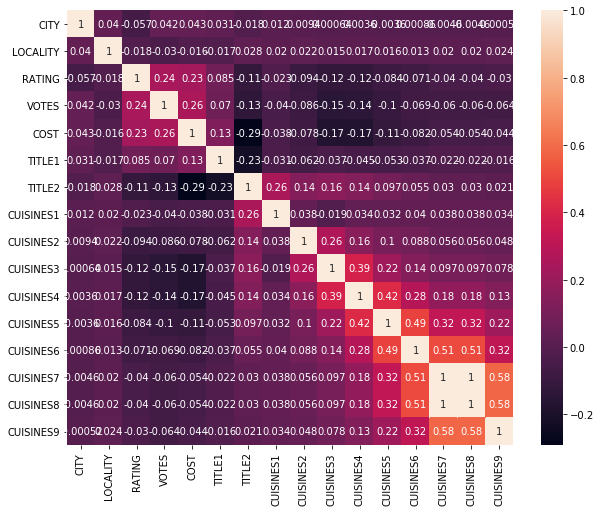

In [503]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(),annot=True)

Here we can see the relation of independent variable with dependent variable......cost is highly related with rating and votes

# setting x and y variable

In [504]:
x_train=df_train.drop('COST',axis=1)
x_train.shape

(12690, 15)

In [505]:
y_train=df_train['COST']
y_train.shape

(12690,)

In [506]:
x_test=df_test
x_test.shape

(4231, 15)

# Regression

In [507]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# LinearRegression

In [508]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.17455982572969686

In [509]:
pred_y=lr.predict(x_test)
print((pred_y))

[897.71346902 754.1764179  935.21566877 ... 923.17621962  76.51119217
 651.4090975 ]


In [510]:
score=cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.15159815 0.16454665 0.13024724 0.17817505 0.2074337 ]
0.16640015707775715
0.02589195986187418


# Lasso

In [511]:
from sklearn.linear_model import Lasso
lsr=Lasso()
pr={'alpha':[.0001,.001,.01,.1,1]}
gs=GridSearchCV(lsr,pr,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'alpha': 1}

In [512]:
lsr=Lasso(alpha=1)
lsr.fit(x_train,y_train)
lsr.score(x_train,y_train)

0.1745561453722626

In [513]:
pred_y=lsr.predict(x_test)
print((pred_y))

[896.99525885 753.62887022 935.19399689 ... 923.27969806  79.243655
 650.89165115]


In [514]:
score=cross_val_score(lsr,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.15165576 0.16457195 0.13014974 0.17820078 0.207483  ]
0.1664122450816477
0.025930239093306214


# KNeighborsregressor

In [515]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
pr={'n_neighbors':range(1,30)}
gs=GridSearchCV(knn,pr,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'n_neighbors': 27}

In [516]:
knn=KNeighborsRegressor(n_neighbors=27)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.23903752470309303

In [517]:
pred_y=knn.predict(x_test)
print((pred_y))

[922.22222222 500.         935.18518519 ... 727.77777778 535.18518519
 364.81481481]


In [518]:
score=cross_val_score(knn,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.15060775 0.17187536 0.15692581 0.18712393 0.20085585]
0.173477739992582
0.018629816180138065


# GradientBoostingRegressor

In [519]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
pr={'learning_rate':[.0001,.001,.01,.1,1],'n_estimators':[10,50,100,150,200,250,300]}
gs=GridSearchCV(gb,pr,cv=5)
gs.fit(x_train,y_train)
gs.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [520]:
gb=GradientBoostingRegressor(learning_rate=0.1,n_estimators=300)
gb.fit(x_train,y_train)
gb.score(x_train,y_train)

0.7699252586069099

In [521]:
pred_y=gb.predict(x_test)
print((pred_y))

[1036.00093931 1425.28393505  665.45319232 ...  646.19983896  435.53824662
  408.05918331]


In [522]:
score=cross_val_score(gb,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.65237755 0.74148075 0.7391794  0.72059707 0.76781946]
0.7242908456926478
0.03897965677453707


# RandomForestRegressor

In [523]:
from sklearn.ensemble import RandomForestRegressor
re=RandomForestRegressor()
pr={'n_estimators':[10,50,100,150,200,250,300]}
gs=GridSearchCV(re,pr,cv=5)
gs.fit(x_train,y_train)
gs.best_params_


{'n_estimators': 150}

In [524]:
re=RandomForestRegressor(n_estimators=150)
re.fit(x_train,y_train)
re.score(x_train,y_train)

0.9587869914846806

In [525]:
pred_y=re.predict(x_test)
print((pred_y))

[1124.33333333 1505.33333333  715.33333333 ...  606.33333333  377.93333333
  279.26666667]


In [526]:
score=cross_val_score(re,x_train,y_train,cv=5,scoring='r2')
print(score)
print(score.mean())
print(score.std())

[0.64496325 0.73486907 0.67421573 0.68988911 0.75103298]
0.6989940280443981
0.03901604791970433


# Saving the Prediction

in this dataset the randomforestregressor is performing good.....so we select the randomforestregressor for this dataset

In [527]:
pred=re.predict(x_test)
print((pred))

[1124.33333333 1505.33333333  715.33333333 ...  606.33333333  377.93333333
  279.26666667]


In [528]:
y_pred=(pred)

In [529]:
y_pred=pd.DataFrame(y_pred)

In [530]:
y_pred.to_csv('prediction_y_food_cost.csv')

In [531]:
y_pred

,0
0,1124.333333
1,1505.333333
2,715.333333
3,479.000000
4,304.333333
...,...
4226,482.000000
4227,398.333333
4228,606.333333
4229,377.933333
